# 설문조사_유사답변_데이터관리.ipynb에서 가공하고 저장한 test_finish.csv파일에서 가장 많이 나온 명사, 형용사, 동사를 WordCloud로 시각화 하는 코드

In [87]:
cd "/content/drive/MyDrive/Colab Notebooks/데이터분석"

/content/drive/MyDrive/Colab Notebooks/데이터분석


In [ ]:
!pip install konlpy
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 54.5 MB/s 
     |████████████████████████████████| 453 kB 54.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("test_finish.csv")
df.head(2)

,index,respondentID,Q47_1,Q48_2,Q51_2,Q369_2
0,0,6280,NaN,Experirnced some occasional glitches on the we...,Fix technical glitches. Put up the honest reviews,"Good camera , good battery life. Good processi..."
1,1,64,NaN,Greta overall battery life and camera quality ...,Has good amount of info and details of the pho...,Great battery life and resolution on camera. D...


# 1. 분석하고 싶은 colum 가공하기

In [106]:
# = 문자만 삭제하기 위해 결측지를 =로 채우기
df.fillna("=",inplace=True)

In [126]:
print("어느 항목의 키워드를 분석하고 싶으신가요?")
colum_idx = int(input("1번 Q47_1\t 2번 Q48_2\t 3번 Q51_2\t 4번 Q369_2\n"))

colums = ["Q47_1","Q48_2","Q51_2","Q369_2"]

어느 항목의 키워드를 분석하고 싶으신가요?
1번 Q47_1	 2번 Q48_2	 3번 Q51_2	 4번 Q369_2
3


In [127]:
analyze = df[colums[colum_idx-1]].values

In [128]:
# test용으로 하나의 컬럼만 불러오기
value = []

In [129]:
for i in range(len(analyze)):
  if analyze[i]!="=":
    value.append(str(analyze[i]))

In [130]:
text = " ".join(value)
len(text), text[:50]

(121146, 'Fix technical glitches. Put up the honest reviews ')

# 2. 품사별 단어 빈도

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

In [131]:
from collections import Counter

def tokens_pos(text):
  # 불필요한 심볼 제거
  cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',text) # 문장단위로 끊기

  # 대문자를 소문자로 변환
  cleaned_content = cleaned_content.lower()

  # 각 단어를 토큰으로 나누기
  word_tokens = nltk.word_tokenize(cleaned_content)

  # pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
  tokens_pos = nltk.pos_tag(word_tokens)

  return tokens_pos

In [132]:
def word_cloud(word_token,n):
  words = []
  PartOfSpeech = ["NN","JJ","VBP"] # NN : 명사 , JJ : 형용사, VBP : 동사
  for word, pos in word_token:
    if PartOfSpeech[n] in pos:
        words.append(word)


  # nltk에서 제공되는 WordNetLemmatizer을 이용
  # ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
  wlem = nltk.WordNetLemmatizer()
  lemmatized_words = []
  for word in words:
      new_word = wlem.lemmatize(word)
      lemmatized_words.append(new_word)
  
  stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
  #print('stopwords: ', stopwords_list)
  unique_NN_words = set(lemmatized_words)
  final_NN_words = lemmatized_words

  # 불용어 제거
  for word in unique_NN_words:
      if word in stopwords_list:
          while word in final_NN_words: final_NN_words.remove(word)

  # 불용어 커스텀
  customized_stopwords = ['be', 'today', 'yesterday', "it's", "don’t","i","next","able","many","much","a"] # 직접 만든 불용어 사전

  unique_NN_words1 = set(final_NN_words)
  for word in unique_NN_words1:
      if word in customized_stopwords:
          while word in final_NN_words: final_NN_words.remove(word)

  # 빈도 분석
  
  return final_NN_words

In [135]:
token_pos = tokens_pos(text)
  
print("어떤 품사를 보고싶으싶니까?\n1번 명사 \t 2번 형용사 \t 3번 동사")
n = int(input(""))
final_words = word_cloud(token_pos,n-1)

어떤 품사를 보고싶으싶니까?
1번 명사 	 2번 형용사 	 3번 동사
2


# 3. 워드클라우드로 시각화 하기

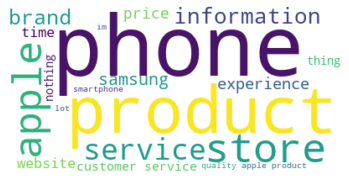

In [125]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path


test = ''
for word in final_words:
    test = test +' '+word

wordcloud = WordCloud(max_font_size=100, max_words=20, background_color='white', relative_scaling=.5).generate(test)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()